In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from dateutil.parser import parse
from datetime import timedelta
from tqdm import tqdm

In [42]:
def parse_date(time_array):
    date_=[] #replace korean to english

    for i in time_array:
        i = i.replace("오전", "AM")
        i = i.replace("오후", "PM")
        date_.append(i)

    date__=[] #split blank

    for i in date_:
        date__.append(i.split(" "))

    date___=[] #switch index

    for i in date__: #위치 변경
        tmp = i[1] 
        i[1] = i[2]
        i[2] = tmp
        date___.append(i)

    parsing_date=[]

    for i in tqdm(date___):
        #print('parsing: ', i, "=", (" ").join(i))
        dt = parse((" ").join(i)) #list to string
        #print(dt)
        #print()
        parsing_date.append(dt)

    parsing_date = np.array(parsing_date)
        
    return parsing_date

In [49]:
def cal_time(time_array):
    date_=[] #replace korean to english

    for i in time_array:
        i = i.replace("오전", "AM")
        i = i.replace("오후", "PM")
        date_.append(i)

    date__=[] #split blank

    for i in date_:
        date__.append(i.split(" "))

    date___=[] #switch index

    for i in date__: #위치 변경
        tmp = i[1] 
        i[1] = i[2]
        i[2] = tmp
        date___.append(i)

    parsing_date=[]

    for i in tqdm(date___):
        #print('parsing: ', i, "=", (" ").join(i))
        dt = parse((" ").join(i)) #list to string
        #print(dt)
        #print()
        parsing_date.append(dt)

    parsing_date = np.array(parsing_date)
    
    time = parsing_date[-1] - parsing_date[0]
        
    return time

cc-20mA

In [10]:
dt_20_1 = pd.read_csv("data/dodi_cc/CC-20mA_1.csv").iloc[4:,:3].reset_index() #행,열
dt_20_2 = pd.read_csv("data/dodi_cc/CC-20mA_2.csv").iloc[:,:3] #행,열
dt_20 = dt_20_1.append(dt_20_2, ignore_index=True)

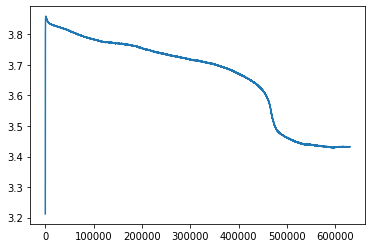

In [35]:
plt.plot(dt_20['Voltage(V)'][:630000])

In [39]:
str(parsing_date[-1] - parsing_date[0])

'3 days, 14:14:58'

cc-40mA

In [16]:
dt_40 = pd.read_csv("data/dodi_cc/CC-40mA.csv").iloc[4:,:3].reset_index()

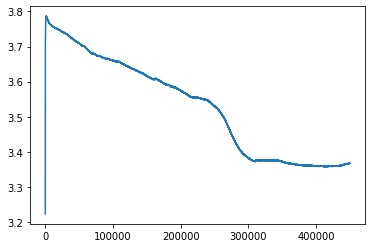

In [32]:
plt.plot(dt_40['Voltage(V)'][:450000])

In [43]:
dt_40_time = parse_date(dt_40['Time'][:450000])

100%|███████████████████████████████████████████████████████████████████████| 450000/450000 [00:41<00:00, 10831.97it/s]


In [44]:
str(dt_40_time[-1] - dt_40_time[0])

'2 days, 0:11:51'

cc-60mA

In [19]:
dt_60 = pd.read_csv("data/dodi_cc/CC-60mA.csv").iloc[:,:3]

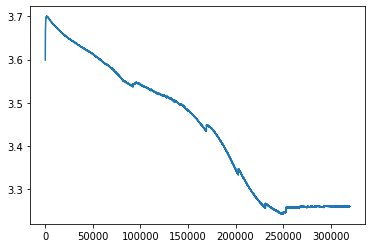

In [28]:
plt.plot(dt_60['Voltage(V)'][:320000])

In [45]:
dt_60_time = parse_date(dt_60['Time'][:320000])

100%|███████████████████████████████████████████████████████████████████████| 320000/320000 [00:28<00:00, 11295.80it/s]


In [46]:
str(dt_60_time[-1] - dt_60_time[0])

'1 day, 3:46:02'

cc-80mA

In [23]:
dt_80 = pd.read_csv("data/dodi_cc/CC-80mA.csv").iloc[:,:3]

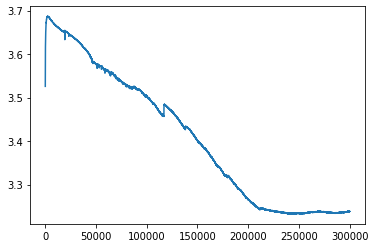

In [29]:
plt.plot(dt_80['Voltage(V)'][:300000])

In [47]:
dt_80_time = parse_date(dt_80['Time'][:300000])

100%|███████████████████████████████████████████████████████████████████████| 300000/300000 [00:27<00:00, 11017.90it/s]


In [48]:
str(dt_80_time[-1] - dt_80_time[0])

'19:59:56'